# Web scraping

## Step 1: Install dependencies
Make sure you have the Python `Pandas` and `requests` packages installed to be able to work on the project. In case you do not have the libraries installed, run them in the console:

```console
pip install pandas requests
```
or

```console
conda install pandas requests
```

In [34]:
#TODO
import pandas as pd
import requests
from bs4 import BeautifulSoup
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

## Step 2: Download HTML
The download of the HTML of the web page will be done with the `requests` library, as we saw in the module theory.

The web page we want to scrape is the following: https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue. It collects and stores information about the growth of the company every three months, since June 2009. It stores the text scraped from the web in some variable.

In [21]:
# TODO
url = 'https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue'
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'}

html_data = request_data = requests.get('https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue', headers=headers)

html_data

<Response [200]>

In [22]:
html_data.text

'\r\n<!DOCTYPE html>\r\n<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->\r\n<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->\r\n<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->\r\n<!--[if gt IE 8]><!--> <html class="no-js"> <!--<![endif]-->\r\n    <head>\r\n        <meta charset="utf-8">\r\n        <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">\r\n\t\t<link rel="canonical" href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" />\r\n\t\t<title>Tesla Revenue 2010-2023 | TSLA | MacroTrends</title>\r\n\t\t<link rel="icon" type="image/x-icon" href="/assets/images/icons/FAVICON/macrotrends-favicon.ico">\r\n\t\t<meta name="description" content="Tesla annual/quarterly revenue history and growth rate from 2010 to 2023. Revenue can be defined as the amount of money a company receives from its customers in exchange for the sales of goods or services.  Revenue is the top line item on an income statement

## Step 3: Transform the HTML
The next step to start extracting the information is to transform it into a structured object. Do this using `BeautifulSoup`. Once you have interpreted the HTML correctly, parse it to:

1. Find all the tables.
2. Find the table with the quarterly evolution.
4. Store the data in a DataFrame.

In [23]:
# TODO
parsed_html_tables = BeautifulSoup(html_data.text, 'html.parser').find_all('table')
parsed_html_tables

[<table class="historical_data_table table">
 <thead>
 <tr>
 <th colspan="2" style="text-align:center">Tesla Annual Revenue<br/><span style="font-size:14px;">(Millions of US $)</span></th>
 </tr>
 </thead>
 <tbody>
 <tr>
 <td style="text-align:center">2022</td>
 <td style="text-align:center">$81,462</td>
 </tr>
 <tr>
 <td style="text-align:center">2021</td>
 <td style="text-align:center">$53,823</td>
 </tr>
 <tr>
 <td style="text-align:center">2020</td>
 <td style="text-align:center">$31,536</td>
 </tr>
 <tr>
 <td style="text-align:center">2019</td>
 <td style="text-align:center">$24,578</td>
 </tr>
 <tr>
 <td style="text-align:center">2018</td>
 <td style="text-align:center">$21,461</td>
 </tr>
 <tr>
 <td style="text-align:center">2017</td>
 <td style="text-align:center">$11,759</td>
 </tr>
 <tr>
 <td style="text-align:center">2016</td>
 <td style="text-align:center">$7,000</td>
 </tr>
 <tr>
 <td style="text-align:center">2015</td>
 <td style="text-align:center">$4,046</td>
 </tr>
 <t

In [24]:
for idx, table in enumerate(parsed_html_tables):
    if "Tesla Quarterly Revenue" in str(table):
        table_index = idx
        break

#tesla_revenue_df = pd.DataFrame(columns=['Revenue','Date'])

data_ext = {
    'Revenue': [],
    'Date': [],
}

for row in parsed_html_tables[table_index].tbody.find_all('tr'):
    col = row.find_all('td')
    if col != []:
        data_ext['Date'].append(col[0].text)
        data_ext['Revenue'].append(col[1].text)
        
tesla_rev_df = pd.DataFrame(data=data_ext)
tesla_rev_df.head()

,Revenue,Date
0,"$23,350",2023-09-30
1,"$24,927",2023-06-30
2,"$23,329",2023-03-31
3,"$24,318",2022-12-31
4,"$21,454",2022-09-30


## Step 4: Process the DataFrame
Next, clean up the rows to get clean values by removing `$` and commas. Remove also those that are empty or have no information.

In [25]:
# TODO
tesla_rev_df['Revenue'] = tesla_rev_df['Revenue'].str.replace('$','', regex=True)
tesla_rev_df['Revenue'] = tesla_rev_df['Revenue'].str.replace(',','', regex=True)

tesla_rev_df = tesla_rev_df[tesla_rev_df['Revenue'] != '']

tesla_rev_df.head()

,Revenue,Date
0,23350,2023-09-30
1,24927,2023-06-30
2,23329,2023-03-31
3,24318,2022-12-31
4,21454,2022-09-30


## Step 5: Store the data in sqlite
Create an empty instance of the database and include the clean data in it, as we saw in the database module. Once you have an empty database:

1. Create the table.
2. Insert the values.
3. Store (`commit`) the changes.

In [26]:
# TODO
conn = sqlite3.connect('sql.db')
cursor = conn.cursor()

In [27]:
orders = """
    DROP TABLE IF EXISTS REVENUE;
    CREATE TABLE REVENUE(Revenue INTEGER, Date VARCHAR(128));
"""
cursor.executescript(orders)

In [28]:
tesla = list(tesla_rev_df.to_records(index=False))
print(tesla[:10])

[('23350', '2023-09-30'), ('24927', '2023-06-30'), ('23329', '2023-03-31'), ('24318', '2022-12-31'), ('21454', '2022-09-30'), ('16934', '2022-06-30'), ('18756', '2022-03-31'), ('17719', '2021-12-31'), ('13757', '2021-09-30'), ('11958', '2021-06-30')]


In [29]:
cursor.executemany(
    "INSERT INTO REVENUE(Revenue, Date) VALUES(?,?)", tesla
)

In [30]:
conn.commit()

In [31]:
for row in cursor.execute('SELECT * FROM REVENUE LIMIT 10'):
    print(row)

(23350, '2023-09-30')
(24927, '2023-06-30')
(23329, '2023-03-31')
(24318, '2022-12-31')
(21454, '2022-09-30')
(16934, '2022-06-30')
(18756, '2022-03-31')
(17719, '2021-12-31')
(13757, '2021-09-30')
(11958, '2021-06-30')


## Step 6: Visualize the data
What types of visualizations can we make? Suggest at least 3 and plot them.

In [39]:
tesla_rev_df['Date'] = pd.to_datetime(tesla_rev_df['Date'])
tesla_rev_df['Revenue'] = tesla_rev_df['Revenue'].astype("int")

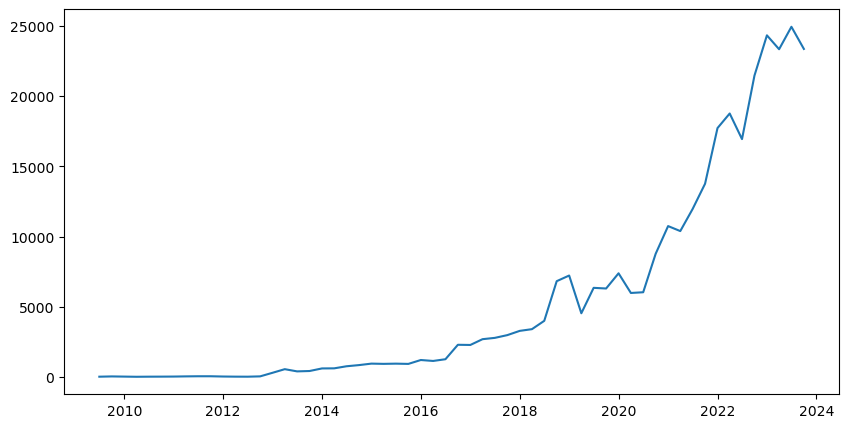

In [40]:
# TODO
fig, ax = plt.subplots(figsize = (10,5))

ax.plot(tesla_rev_df['Date'], tesla_rev_df['Revenue'])

<StemContainer object of 3 artists>

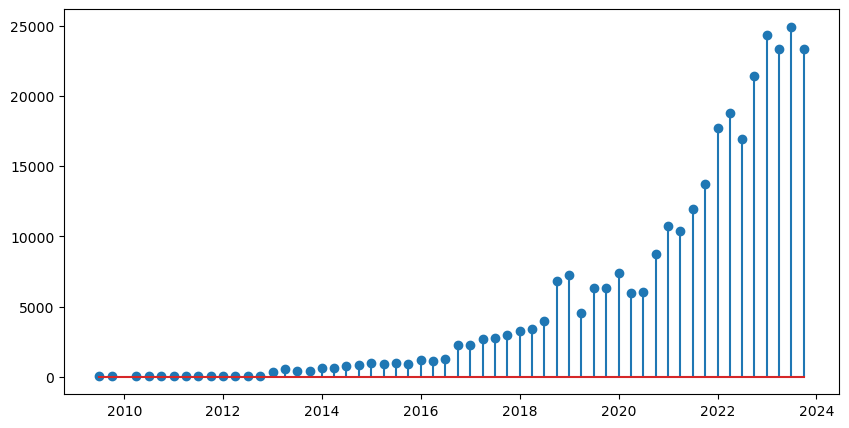

In [49]:
# TODO

fig, ax = plt.subplots(figsize = (10,5))

ax.stem(tesla_rev_df['Date'], tesla_rev_df['Revenue'])

<BarContainer object of 57 artists>

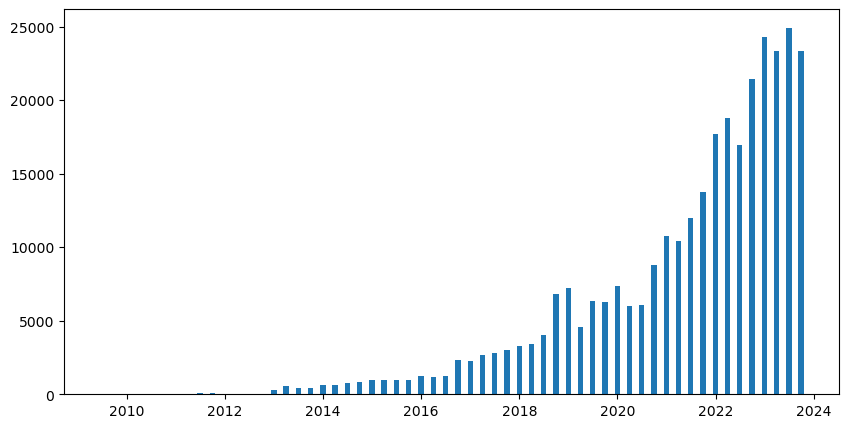

In [53]:
# TODO

fig, ax = plt.subplots(figsize = (10,5))

ax.bar(tesla_rev_df['Date'], tesla_rev_df['Revenue'], width=40)